In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [5]:
# Use SQLAlchemy create_engine to connect to your sqlite database.
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

### --- Begin Exploratory Sandbox ---

In [10]:
# Use inspect to explore the given data
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [11]:
# Get a list of column names and types for 'measurement' table
columns = inspector.get_columns('measurement')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [12]:
# Peek at 'measurement' data
session.query(Measurement.id,
              Measurement.station,
              Measurement.date,
              Measurement.prcp,
             Measurement.tobs,).\
order_by(Measurement.date.desc()).\
limit(10).\
all()

[(2724, 'USC00519397', '2017-08-23', 0.0, 81.0),
 (7635, 'USC00514830', '2017-08-23', 0.0, 82.0),
 (12187, 'USC00519523', '2017-08-23', 0.08, 82.0),
 (19550, 'USC00516128', '2017-08-23', 0.45, 76.0),
 (2723, 'USC00519397', '2017-08-22', 0.0, 82.0),
 (12186, 'USC00519523', '2017-08-22', 0.0, 82.0),
 (19549, 'USC00516128', '2017-08-22', 0.5, 76.0),
 (2722, 'USC00519397', '2017-08-21', 0.0, 81.0),
 (7634, 'USC00514830', '2017-08-21', 0.02, 79.0),
 (12185, 'USC00519523', '2017-08-21', None, 82.0)]

In [13]:
# determine 'measurement' record count
session.query(func.count(Measurement.id)).all()

[(19550)]

In [14]:
# Get a list of column names and types for 'station' table
columns = inspector.get_columns('station')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [15]:
# Peek at 'station' data
session.query(Station.id,
              Station.station,
              Station.name,
              Station.latitude,
              Station.longitude,
              Station.elevation).\
limit(50).all()

[(1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 (2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6),
 (3,
  'USC00514830',
  'KUALOA RANCH HEADQUARTERS 886.9, HI US',
  21.5213,
  -157.8374,
  7.0),
 (4, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9),
 (5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6),
 (6,
  'USC00519523',
  'WAIMANALO EXPERIMENTAL FARM, HI US',
  21.33556,
  -157.71139,
  19.5),
 (7,
  'USC00519281',
  'WAIHEE 837.5, HI US',
  21.45167,
  -157.84888999999998,
  32.9),
 (8,
  'USC00511918',
  'HONOLULU OBSERVATORY 702.2, HI US',
  21.3152,
  -157.9992,
  0.9),
 (9, 'USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4)]

In [16]:
# determine 'station' record count
session.query(func.count(Station.id)).all()

[(9)]

### --- End Exploratory Sandbox ---

## Step 1 - Climate Analysis and Exploration

### Precipitation Analysis:  Option 1 - Aggregated by Station and Month

In [17]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results.

# Format date for aggregation.  Retain only year and month
prcp_month = func.strftime("%Y-%m", Measurement.date)

# Calculate the date 1 year ago from the last data point in the database
# Perform a query to retrieve the data and precipitation scores
# Query the 'measurement' table, sum 'prcp' by station and by year/month, keep last 12 monthly totals
lastTwelveMonPrcp = session.query(
    prcp_month,
    func.sum(Measurement.prcp)
).\
group_by(prcp_month).\
order_by(prcp_month.desc()).\
limit(12).\
all()

# Confirm query results
lastTwelveMonPrcp

# Create empty lists to store data from the 12 month 'measurement' query
prcp_month = []
prcp_total = []

# Store query count for iteration
lastTwelveMonths = len(lastTwelveMonPrcp)
    
# Add data to the empty lists
for totalPrcp in range(lastTwelveMonths):
    # Sort the dataframe by date
    # Use 'lastTwelveMonths-1' to reorder records from lower-to-higher date display
    prcp_month.append(lastTwelveMonPrcp[(lastTwelveMonths-1)-totalPrcp][0])
    prcp_total.append(lastTwelveMonPrcp[(lastTwelveMonths-1)-totalPrcp][1])

# Save the query results as a Pandas DataFrame and set the index to the date column
lastTwelveMonPrcp_df = pd.DataFrame({
    "date":prcp_month,
    "precipitation":prcp_total
})

# Save an image of the plot

# Confirm expected values in dataframe
lastTwelveMonPrcp_df

,date,precipitation
0,2016-09,49.40
1,2016-10,21.77
2,2016-11,20.56
3,2016-12,35.51
4,2017-01,11.95
5,2017-02,39.06
6,2017-03,29.62
7,2017-04,54.91
8,2017-05,25.27
9,2017-06,20.52


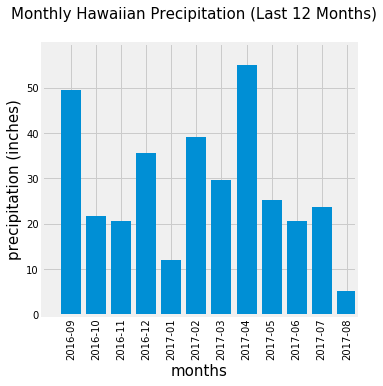

In [18]:
# Use Pandas Plotting with Matplotlib to plot the data

# Create list variable to store last 12 months of aggregated data
precipitation = lastTwelveMonPrcp_df['precipitation']

plt.figure(figsize=(5,5))

# Set x axis and tick locations
x_axis = np.arange(len(lastTwelveMonPrcp_df['date']))
tick_locations = [value+0.4 for value in x_axis]
plt.xticks(tick_locations, lastTwelveMonPrcp_df['date'], rotation="vertical", fontsize=10)
plt.yticks(fontsize=10)

# Sets the x limits of the current chart
plt.xlim(-0.75, len(x_axis)-0.25)

# Sets the y limits of the current chart
plt.ylim(0, max(precipitation)+5)

# Print titles and labels
plt.suptitle('Monthly Hawaiian Precipitation (Last 12 Months)', fontsize=15)
plt.xlabel('months', fontsize=15)
plt.ylabel('precipitation (inches)', fontsize=15)

plt.bar(x_axis, precipitation, alpha=1, align="edge")

# Save an image of the plot
plt.savefig("./Images/LastTwelveMonPrcp.png", bbox_inches = 'tight')

# Show plot
plt.show()

In [19]:
# Use Pandas to calcualte the summary statistics for the last 12 months of precipitation data
lastTwelveMonPrcp_df.describe()

,precipitation
count,12.000000
mean,28.122500
std,14.514943
min,5.180000
25%,20.550000
50%,24.495000
75%,36.397500
max,54.910000


### Precipitation Analysis:  Option 2 - Aggregated by Station and Day

In [20]:
# Design a query to retrieve the last 12 months (last 365 days) of precipitation data and plot the results.

# Save date variable for aggregation
prcp_day = Measurement.date

# Calculate the date 1 year ago from the last data point in the database
# Perform a query to retrieve the data and precipitation scores
# Query the 'measurement' table, sum 'prcp' by sataion, keep last 365 days totals
lastThreeSixtyFiveDaysPrcp = session.query(
    prcp_day,
    func.sum(Measurement.prcp)
).\
group_by(prcp_day).\
order_by(prcp_day.desc()).\
limit(365).\
all()

# Confirm query results
lastThreeSixtyFiveDaysPrcp
#len(lastThreeSixtyFiveDaysPrcp)

# Create empty lists to store data from the 365 days 'measurement' query
prcp_total_365 = []
prcp_day_365 = []

# Store query count for iteration
lastThreeSixtyFiveDays = len(lastThreeSixtyFiveDaysPrcp)
    
# Add data to the empty lists
for totalPrcp in range(lastThreeSixtyFiveDays):
    # Sort the dataframe by date
    # Use 'lastThreeSixtyFiveDays-1' to reorder records from lower-to-higher date display
    prcp_day_365.append(lastThreeSixtyFiveDaysPrcp[(lastThreeSixtyFiveDays-1)-totalPrcp][0])
    prcp_total_365.append(lastThreeSixtyFiveDaysPrcp[(lastThreeSixtyFiveDays-1)-totalPrcp][1])

# Save the query results as a Pandas DataFrame and set the index to the date column
lastThreeSixtyFiveDaysPrcp_df = pd.DataFrame({
    "date":prcp_day_365,
    "precipitation":prcp_total_365
})

# Confirm expected values in dataframe
lastThreeSixtyFiveDaysPrcp_df

,date,precipitation
0,2016-08-24,9.33
1,2016-08-25,0.54
2,2016-08-26,0.10
3,2016-08-27,0.32
4,2016-08-28,3.10
...,...,...
360,2017-08-19,0.09
361,2017-08-20,0.01
362,2017-08-21,0.58
363,2017-08-22,0.50


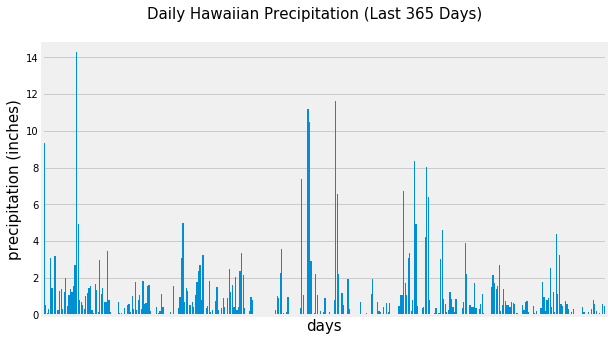

In [21]:
# Use Pandas Plotting with Matplotlib to plot the data

# Create list variable to store last 365 days of aggregated data
precipitation = lastThreeSixtyFiveDaysPrcp_df['precipitation']

# Adjust width and height
plt.figure(figsize=(9,5))

# Set x axis and tick locations
x_axis = np.arange(len(lastThreeSixtyFiveDaysPrcp_df['date']))
tick_locations = [value+0.4 for value in x_axis]
plt.xticks(tick_locations, lastThreeSixtyFiveDaysPrcp_df['date'], rotation="vertical")

# Sets the x limits of the current chart
plt.xlim(-0.75, len(x_axis)-0.25)

# Sets the y limits of the current chart
plt.ylim(0, max(precipitation)+.5)

# Axes manipulation
frame1 = plt.gca() # Get Current Axes
frame1.axes.get_xaxis().set_ticks([])  # Hide x-axis ticks

# Print titles and labels
plt.suptitle('Daily Hawaiian Precipitation (Last 365 Days)', fontsize=15)
plt.xlabel('days', fontsize=15)
plt.ylabel('precipitation (inches)', fontsize=15)

# Plot the bar graph
plt.bar(x_axis, precipitation, alpha=1, align="edge")

# Save an image of the plot
plt.savefig("./Images/LastThreeSixtyFiveDaysPrcp.png", bbox_inches = 'tight')

# Show plot
plt.show()
#plt.tight_layout()



In [22]:
# Use Pandas to calcualte the summary statistics for the last 365 days of precipitation data
lastThreeSixtyFiveDaysPrcp_df.describe()

,precipitation
count,365.000000
mean,0.974164
std,1.776466
min,0.000000
25%,0.050000
50%,0.400000
75%,1.080000
max,14.280000


### Station Analysis

In [23]:
# Design a query to show how many stations are available in this dataset?
session.query(func.count(Station.id)).all()

[(9)]

In [24]:
# What are the most active stations? (i.e. what stations have the most rows)?
session.query(Measurement.station,
              func.count(Measurement.id)
              ).\
group_by(Measurement.station).\
order_by(func.count(Measurement.id).desc()).\
all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [25]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?

# lowest temperature recorded
lowestTemp = func.min(Measurement.tobs)

# highest temperature recorded
highestTemp = func.max(Measurement.tobs)

# average temperature
avgTemp = func.avg(Measurement.tobs)

# query data set per requirements
session.query(Measurement.station,
              lowestTemp,
              highestTemp,
              avgTemp).\
filter(Measurement.station == 'USC00519281').\
all()

[('USC00519281', 54.0, 85.0, 71.66378066378067)]

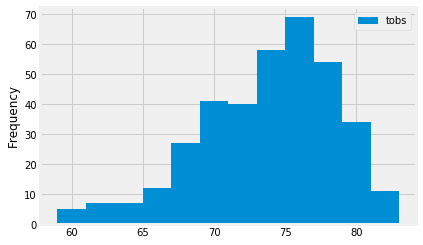

In [26]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
mostActiveStationTemp = session.query(
    Measurement.date,
    Measurement.tobs
).\
filter(Measurement.station == 'USC00519281').\
order_by(Measurement.date.desc()).\
limit(365).\
all()

# Confirm query results
mostActiveStationTemp
#len(mostActiveStationTemp)

# Create empty lists to store data from the 365 days 'measurement' query
mostActiveStation_day_365 = []
mostActiveStation_temp_365 = []

# Store query count for iteration
lastThreeSixtyFiveDays = len(mostActiveStationTemp)
    
# Add data to the empty lists
for totalPrcp in range(lastThreeSixtyFiveDays):
    # Sort the dataframe by date
    # Use 'lastThreeSixtyFiveDays-1' to reorder records from lower-to-higher date display
    mostActiveStation_day_365.append(mostActiveStationTemp[(lastThreeSixtyFiveDays-1)-totalPrcp][0])
    mostActiveStation_temp_365.append(mostActiveStationTemp[(lastThreeSixtyFiveDays-1)-totalPrcp][1])

# Save the query results as a Pandas DataFrame and set the index to the date column
mostActiveStationTemp_df = pd.DataFrame({
    "date":mostActiveStation_day_365,
    "tobs":mostActiveStation_temp_365
})

# Confirm expected values in dataframe
mostActiveStationTemp_df

# plot the results as a histogram
mostActiveStationTemp_df.plot.hist(bins=12)
plt.ylabel("Frequency",fontsize=12)

# Save an image of the histogram
plt.savefig("./Images/mostActiveStationTemp.png", bbox_inches = 'tight')

In [27]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [28]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [29]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)

# Save an image of the bar chart

In [30]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



## Optional Challenge Assignment

In [31]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [32]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [33]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [34]:
# Plot the daily normals as an area plot with `stacked=False`

# Save an image of the plot